In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
len(x_train),len(x_test)

(50000, 10000)

In [4]:
sorted(pd.DataFrame(y_train)[0].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

label : [6]
label : [9]
label : [4]
label : [1]
label : [2]
label : [7]
label : [8]
label : [3]
label : [5]
label : [0]


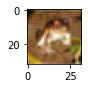

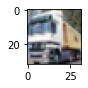

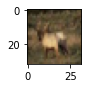

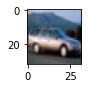

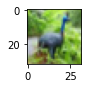

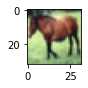

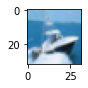

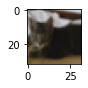

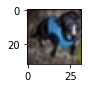

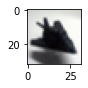

In [5]:
index=[]
for i,j in enumerate(y_train):
    if j not in index:
        plt.figure(figsize = (10,1))
        print("label :",y_train[i])
        
        plt.imshow(x_train[i])
        index.append(j)
    
    

In [6]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [7]:
X_train = x_train / 255
X_test = x_test / 255

In [8]:
X_train.shape

(50000, 32, 32, 3)

### ANN

In [9]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(500, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 94s 59ms/step - loss: 1.8993 - accuracy: 0.3299
Epoch 2/20
 468/1563 [=======>......................] - ETA: 58s - loss: 1.7213 - accuracy: 0.3817

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test,y_test)

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
X_train.shape

In [ ]:
y_train[:9]

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


## CNN

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
# from keras.utils import to_categorical

# # Convert labels to one-hot encoded format
# y_train_encoded = to_categorical(y_train)
# y_test_encoded = to_categorical(y_test)
# y_train_reshaped = y_train.reshape((-1, 50000))  # Assuming each sample has 10 labels
# y_test_reshaped = y_test.reshape((-1, 50000))


In [25]:

# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(12, (3, 3), input_shape=(32, 32, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(54, activation="relu"),
    keras.layers.Dense(10, activation="softmax")  # 10 classes for CIFAR-10
])

early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64,
                    verbose=1, callbacks=[early_stopping])


Epoch 1/15
782/782 [==============================] - 33s 40ms/step - loss: 1.6024 - accuracy: 0.4063 - val_loss: 1.3699 - val_accuracy: 0.5053
Epoch 2/15
782/782 [==============================] - 35s 45ms/step - loss: 1.2803 - accuracy: 0.5394 - val_loss: 1.1495 - val_accuracy: 0.5964
Epoch 3/15
782/782 [==============================] - 32s 41ms/step - loss: 1.1367 - accuracy: 0.5940 - val_loss: 1.0562 - val_accuracy: 0.6248
Epoch 4/15
782/782 [==============================] - 35s 44ms/step - loss: 1.0428 - accuracy: 0.6312 - val_loss: 1.0090 - val_accuracy: 0.6485
Epoch 5/15
782/782 [==============================] - 35s 45ms/step - loss: 0.9770 - accuracy: 0.6559 - val_loss: 0.9693 - val_accuracy: 0.6611
Epoch 6/15
782/782 [==============================] - 31s 40ms/step - loss: 0.9163 - accuracy: 0.6763 - val_loss: 0.9558 - val_accuracy: 0.6736
Epoch 7/15
782/782 [==============================] - 34s 44ms/step - loss: 0.8697 - accuracy: 0.6943 - val_loss: 0.9099 - val_accuracy:

In [26]:


y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm

313/313 [==============================] - 2s 6ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[797,  27,  43,  14,  14,   4,   6,   4,  45,  46],
       [ 29, 858,   4,   8,   4,   2,   9,   3,  22,  61],
       [ 88,   9, 602,  54,  62,  63,  53,  46,  11,  12],
       [ 40,  24,  77, 493,  59, 139,  66,  63,  18,  21],
       [ 33,   7,  97,  57, 607,  36,  50,  96,  11,   6],
       [ 25,   7,  72, 176,  33, 580,  17,  68,  11,  11],
       [ 12,  20,  59,  64,  26,  21, 766,  13,   6,  13],
       [ 21,   7,  27,  34,  30,  45,   8, 793,   5,  30],
       [102,  51,   9,  12,   6,   2,   0,   7, 783,  28],
       [ 37, 122,   6,  12,   4,   4,   6,  12,  25, 772]])>

In [24]:
model.evaluate(X_test,y_test),model.evaluate(X_train,y_train)

313/313 [==============================] - 3s 9ms/step - loss: 0.8527 - accuracy: 0.7083


MemoryError: Unable to allocate 586. MiB for an array with shape (50000, 32, 32, 3) and data type float32

## Data Augmentation and Padding

In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),  padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
cnn.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64,
                    verbose=1)

Epoch 1/15
782/782 [==============================] - 54s 67ms/step - loss: 1.4757 - accuracy: 0.4719 - val_loss: 1.1989 - val_accuracy: 0.5807
Epoch 2/15
782/782 [==============================] - 54s 69ms/step - loss: 1.1062 - accuracy: 0.6139 - val_loss: 1.0608 - val_accuracy: 0.6293
Epoch 3/15
782/782 [==============================] - 54s 70ms/step - loss: 0.9673 - accuracy: 0.6615 - val_loss: 0.9573 - val_accuracy: 0.6660
Epoch 4/15
782/782 [==============================] - 55s 70ms/step - loss: 0.8801 - accuracy: 0.6933 - val_loss: 0.8988 - val_accuracy: 0.6886
Epoch 5/15
782/782 [==============================] - 55s 70ms/step - loss: 0.8162 - accuracy: 0.7159 - val_loss: 0.9101 - val_accuracy: 0.6876
Epoch 6/15
782/782 [==============================] - 56s 71ms/step - loss: 0.7565 - accuracy: 0.7369 - val_loss: 0.9152 - val_accuracy: 0.6908
Epoch 7/15
782/782 [==============================] - 56s 72ms/step - loss: 0.7068 - accuracy: 0.7558 - val_loss: 0.9285 - val_accuracy:

In [33]:
cnn.evaluate(X_test,y_test),model.evaluate(X_train,y_train)

1563/1563 [==============================] - 10s 6ms/step - loss: 0.4032 - accuracy: 0.8616


([0.9982540011405945, 0.7121999859809875],
 [0.4032146632671356, 0.8616200089454651])

still underfit

In [10]:
data_aug= keras.Sequential(
  [
    #layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(32, 32, 3)),
    #layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

In [24]:
cnn = models.Sequential([
    #data_aug,
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
cnn.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=30,
                    verbose=1)

MemoryError: Unable to allocate 586. MiB for an array with shape (50000, 32, 32, 3) and data type float32

In [ ]:
cnn.evaluate(X_test,y_test),cnn.evaluate(X_train,y_train)